# case study gtex_v8


> See the setup notebook if this is a new workspace

> Load example data from AnVIL

In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data

```
export FHIR_PROJECT=ncpi-fhir-cat-2022
export GOOGLE_LOCATION=us-central1
export GOOGLE_DATASET=GTEx_Open_Access
export GOOGLE_DATASTORES=gtex_v8

cd tests/fixtures
mkdir gtex_v8
cd gtex_v8

anvil_curl /Group?_count=1000 | jq -c '.entry[] | .resource' > Group.ndjson
anvil_curl /ResearchSubject?_count=1000 | jq -c '.entry[] | .resource' > ResearchSubject.ndjson
anvil_curl /ActivityDefinition?_count=1000 | jq -c '.entry[] | .resource' > ActivityDefinition.ndjson
anvil_curl /Organization?_count=1000 | jq -c '.entry[] | .resource' > Organization.ndjson
anvil_curl /ResearchStudy?_count=1000 | jq -c '.entry[] | .resource' > ResearchStudy.ndjson
anvil_curl /Patient?_count=1000 | jq -c '.entry[] | .resource' > Patient.ndjson
anvil_curl /DocumentReference?_count=1000 | jq -c '.entry[] | .resource' > DocumentReference.ndjson
anvil_curl /ObservationDefinition?_count=1000 | jq -c '.entry[] | .resource' > ObservationDefinition.ndjson
anvil_curl /ValueSet?_count=1000 | jq -c '.entry[] | .resource' > ValueSet.ndjson
anvil_curl /ConceptMap?_count=1000 | jq -c '.entry[] | .resource' > ConceptMap.ndjson
anvil_curl /CodeSystem?_count=1000 | jq -c '.entry[] | .resource' > CodeSystem.ndjson
anvil_curl /Observation?_count=1000 | jq -c '.entry[] | .resource' > Observation.ndjson
anvil_curl /Specimen?_count=1000 | jq -c '.entry[] | .resource' > Specimen.ndjson
anvil_curl /Task?_count=1000 | jq -c '.entry[] | .resource' > Task.ndjson
```

These files are in the workspace bucket.

* open terra terminal window
```
cd ~/NCPI FHIR CAT 2022 - Working Space/edit
gsutil -m cp -r  $WORKSPACE_BUCKET/gtex_v8 .
```




> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide


In [3]:
from glob import glob
gtex_v8_file_paths = glob('./gtex_v8/*.ndjson')

In [4]:
graph = load_graph('gtex_v8', gtex_v8_file_paths, expected_resource_count=5062, strict=True, check_edges=True)

### Draw a summary graph

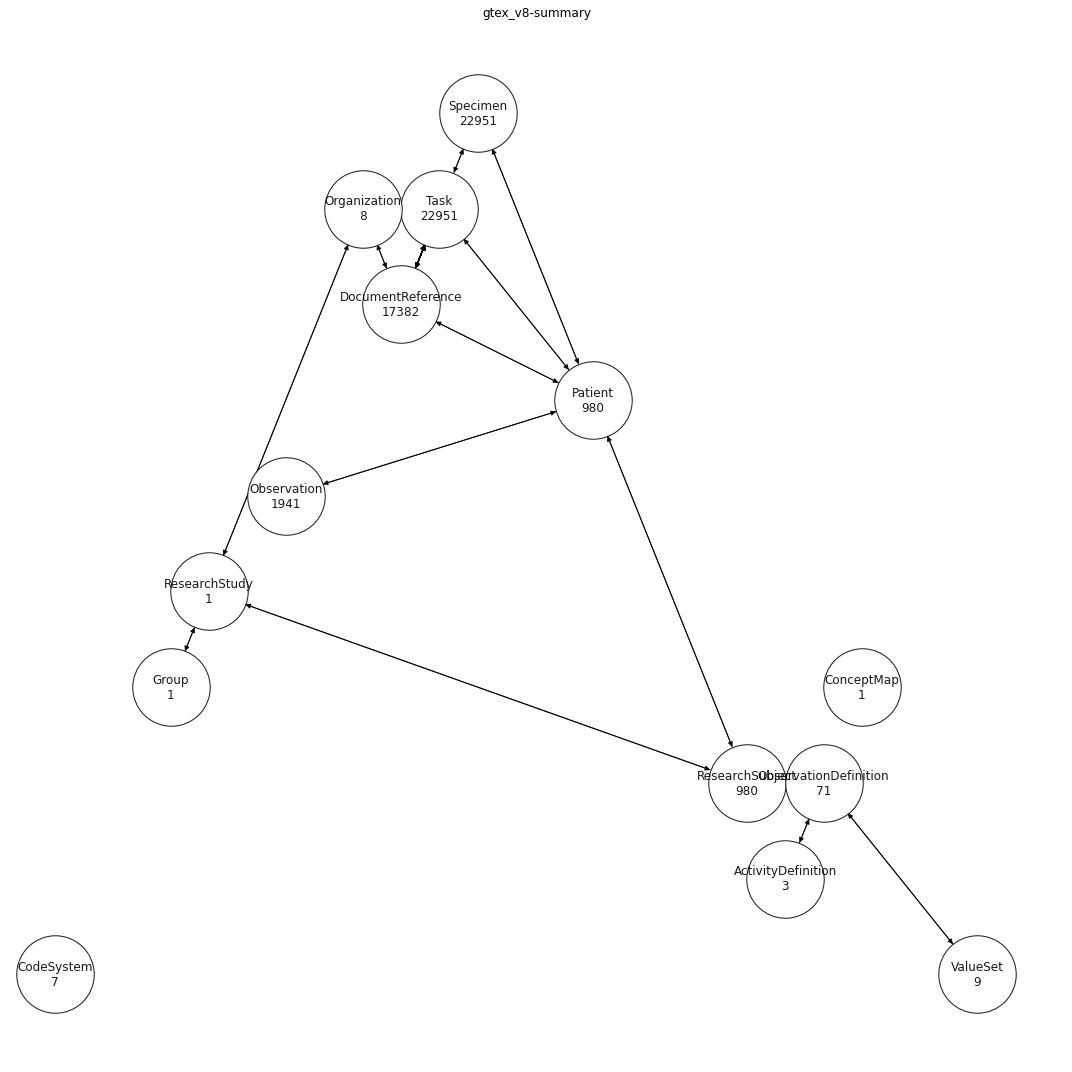

In [5]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'gtex_v8-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [6]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 980, "should have 980 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [7]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_tag_0_system,meta_tag_0_code,identifier_0_use,identifier_0_system,identifier_0_value,gender,resourceType
0,0f2f77e4-fd3d-48cf-8857-65489286e95f,MTY1NjEwMjkxOTA4MDk1MjAwMA,2022-06-24T20:35:19.080952+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-YEC3,male,Patient
1,d5cff7d0-d90e-4cba-9a13-a0468488f867,MTY1NjEwMjkxOTA2NTU4NjAwMA,2022-06-24T20:35:19.065586+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1QP29,male,Patient
2,e891e60c-e9ff-40bd-9337-dcbc3c355134,MTY1NjEwMjkxOTA0MjMyMDAwMA,2022-06-24T20:35:19.042320+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1K2DU,male,Patient
3,3129a62f-d34c-4ed4-bf68-71235915bb8c,MTY1NjEwMjkxOTAxOTgxMjAwMA,2022-06-24T20:35:19.019812+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-13JUV,female,Patient
4,a3b67d53-9e5a-4958-b4da-58c02c81cb78,MTY1NjEwMjkxOTAwMjAwODAwMA,2022-06-24T20:35:19.002008+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1F48J,female,Patient
...,...,...,...,...,...,...,...,...,...,...
975,eda46df0-18bf-4c6d-848b-6e07c6598711,MTY1NjEwMjkwMDUxMTUyOTAwMA,2022-06-24T20:35:00.511529+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1RDX4,female,Patient
976,ccf6bc0e-aa26-4500-834c-99490391c9dd,MTY1NjEwMjkwMDUxMDg1NjAwMA,2022-06-24T20:35:00.510856+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-ZUA1,male,Patient
977,aba5ca86-2afa-461b-b3c4-d8be65e3f3ac,MTY1NjEwMjkwMDUxMDczMTAwMA,2022-06-24T20:35:00.510731+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-PWCY,female,Patient
978,0cdcb821-32b6-4cd6-95e7-60fac56df03c,MTY1NjEwMjkwMDUwOTM4NTAwMA,2022-06-24T20:35:00.509385+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-13O3O,female,Patient


### Show simplified details

> 1/3 the number of columns

In [8]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_tag_researchstudy,identifier_https://anvilproject.org/gtex/fhir/patient,gender
0,0f2f77e4-fd3d-48cf-8857-65489286e95f,MTY1NjEwMjkxOTA4MDk1MjAwMA,2022-06-24T20:35:19.080952+00:00,GTEx,GTEX-YEC3,male
1,d5cff7d0-d90e-4cba-9a13-a0468488f867,MTY1NjEwMjkxOTA2NTU4NjAwMA,2022-06-24T20:35:19.065586+00:00,GTEx,GTEX-1QP29,male
2,e891e60c-e9ff-40bd-9337-dcbc3c355134,MTY1NjEwMjkxOTA0MjMyMDAwMA,2022-06-24T20:35:19.042320+00:00,GTEx,GTEX-1K2DU,male
3,3129a62f-d34c-4ed4-bf68-71235915bb8c,MTY1NjEwMjkxOTAxOTgxMjAwMA,2022-06-24T20:35:19.019812+00:00,GTEx,GTEX-13JUV,female
4,a3b67d53-9e5a-4958-b4da-58c02c81cb78,MTY1NjEwMjkxOTAwMjAwODAwMA,2022-06-24T20:35:19.002008+00:00,GTEx,GTEX-1F48J,female
...,...,...,...,...,...,...
975,eda46df0-18bf-4c6d-848b-6e07c6598711,MTY1NjEwMjkwMDUxMTUyOTAwMA,2022-06-24T20:35:00.511529+00:00,GTEx,GTEX-1RDX4,female
976,ccf6bc0e-aa26-4500-834c-99490391c9dd,MTY1NjEwMjkwMDUxMDg1NjAwMA,2022-06-24T20:35:00.510856+00:00,GTEx,GTEX-ZUA1,male
977,aba5ca86-2afa-461b-b3c4-d8be65e3f3ac,MTY1NjEwMjkwMDUxMDczMTAwMA,2022-06-24T20:35:00.510731+00:00,GTEx,GTEX-PWCY,female
978,0cdcb821-32b6-4cd6-95e7-60fac56df03c,MTY1NjEwMjkwMDUwOTM4NTAwMA,2022-06-24T20:35:00.509385+00:00,GTEx,GTEX-13O3O,female


## Navigate using FHIR references

In [9]:
research_subjects = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'ResearchSubject')]
patients = [research_subject.individual for research_subject in research_subjects]
f"research_subjects: {len(research_subjects)} patients: {len(patients)}"

'research_subjects: 980 patients: 980'

In [10]:
document_references = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'DocumentReference')]
f"document_references: {len(document_references)}"

'document_references: 17382'

## Navigate using graph paths

> Since we provided links in both directions, we can ask the graph to traverse from Patient to ResearchStudy or Observation.  This provides similar functionality to FHIR's _revinclude

In [11]:
patient_id = 'Patient/0f2f77e4-fd3d-48cf-8857-65489286e95f'
research_studies = find_nearest(graph, patient_id, 'ResearchStudy')
assert research_studies[0], f"Should traverse Patient to ResearchStudy {research_studies}"
research_study = graph.nodes[research_studies[0]]['resource'] 
observations = [edge[0] for edge in graph.in_edges(patient_id) if 'Observation' in edge[0]]

f"{patient_id} belongs to ResearchStudy {research_study.identifier[0].value}, and has {len(observations)} observations"


'Patient/0f2f77e4-fd3d-48cf-8857-65489286e95f belongs to ResearchStudy GTEx, and has 2 observations'

## Create data frame of specimens with associated patient observations and documents

```
# dataframe looks like
#   columns: 
#       document_reference_attachment_uri (either drs:// or gs://), 
#       drs_uri, (if it exists)
#       document_reference_reference, ( DocumentReference/1234 )
#       file_path,  (downloaded document_reference_attachment_uri on local file system)
#       specimen_bodySite, 
#       condition_code,
#       research_study_reference, (full uri of research_study https:/example.com/fhir/ResearchStudy/1234)
#       patient_reference, (full uri  https:/example.com/fhir/Patient/123)
#       specimen_reference, (full uri  https:/example.com/fhir/Specimen/123)
#       ... extra columns (eg. observations) allowed
#   index:
#       document_reference_reference

```

In [55]:
from collections import defaultdict

# use the task to associate documents associated with specimens

base_url = 'https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir'
def specimen_view_factory():
    return {'attachments': [], 'subject': None, 'specimen': None, 'research_study_reference': f"{base_url}/{research_studies[0]}"}


specimens_to_documents = defaultdict(specimen_view_factory)
tasks = [graph_attributes['resource'] for id_, graph_attributes in  find_by_resource_type(graph, 'Task')]

for task in tasks:
    if task.output:
        specimen = task.focus.reference
        document_reference_references = [
            f"{base_url}/{dr.valueReference.reference}"
            for dr in task.output if dr.valueReference and 'DocumentReference' in dr.valueReference.reference
        ]
        if len(document_reference_references) == 0:
            continue
        document_reference_reference = document_reference_references[0]
        specimens_to_documents[specimen]['attachments'] = [
            dr.valueReference.resolved().content[0].attachment 
            for dr in task.output if dr.valueReference and 'DocumentReference' in dr.valueReference.reference
        ]

        specimens_to_documents[specimen]['document_reference_reference']  = document_reference_reference
        
        specimens_to_documents[specimen]['patient_reference'] = f"{base_url}/{task.for_fhir.reference}"
        specimens_to_documents[specimen]['specimen_reference'] = f"{base_url}/{specimen}"
        specimens_to_documents[specimen]['subject'] = task.for_fhir.reference
        specimens_to_documents[specimen]['specimen'] = specimen
        specimens_to_documents[specimen]['specimen_bodySite'] = task.focus.resolved().collection.bodySite.coding[0].code

for specimen_id, specimen_view in specimens_to_documents.items():
    for index, attachment in enumerate(specimen_view['attachments']):
        specimen_view[f"drs_uri"] = attachment.url if 'drs://' in attachment.url else None
        specimen_view[f"document_reference_attachment_uri"] = attachment.url
        specimen_view[f"file_name"] = attachment.url.split('/')[-1]
        specimen_view[f"file_path"] = f"gtex_v8/{attachment.url.split('/')[-1]}"
        
        break
    del specimen_view['attachments']
    

# flatten observations associated with subjects

def subject_view_factory():
    return {'observations': [], 'subject': None, 'gender': None}

subjects_to_observations = defaultdict(subject_view_factory)
observations = [graph_attributes['resource'] for id_, graph_attributes in  find_by_resource_type(graph, 'Observation')]

for observation in observations:
    subject = observation.subject.reference
    gender = observation.subject.resolved().gender
    subjects_to_observations[subject]['observations'].append(observation)
    subjects_to_observations[subject]['patient_reference'] = f"{base_url}/{subject}"
    subjects_to_observations[subject]['subject'] = subject
    subjects_to_observations[subject]['gender'] = gender


for subject_id, subject_view in subjects_to_observations.items():
    for index, observation in enumerate(subject_view['observations']):        
        subject_view[observation.code.coding[0].code] = next(iter([v.as_simplified_json()[0] for k, v in vars(observation).items() if k.startswith('value') and v ]), None)
    del subject_view['observations']

# combine the two views, create data frame with specimen as index    
    
data_frame = [ 
    flatten({
        **specimen_to_documents,
        **subjects_to_observations[specimen_to_documents['subject']]        
    })
    for specimen_to_documents in specimens_to_documents.values()
]
    
df = pd.DataFrame(data_frame).fillna('').set_index('document_reference_reference').drop(columns=['subject', 'specimen'])
df

,research_study_reference,patient_reference,specimen_reference,specimen_bodySite,drs_uri,document_reference_attachment_uri,file_name,file_path,gender,Age_low_value,Age_low_unit,Age_low_system,Age_low_code,Age_high_value,Age_high_unit,Age_high_system,Age_high_code,dthhrdy_coding_DTHHRDY,dthhrdy_text
document_reference_reference,,,,,,,,,,,,,,,,,,,
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/db004f5f-1f13-4f6e-831a-890c3a26adeb,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,UBERON:0001621,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-1LGOU-0426-SM-D3L8O-tpm.tsv.gz,gtex_v8/GTEX-1LGOU-0426-SM-D3L8O-tpm.tsv.gz,female,20,year,http://unitsofmeasure.org,a,29,year,http://unitsofmeasure.org,a,Ventilator-Case,0
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/d4a01d42-0112-4e7d-b547-e3c89cb4aaed,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,C16403,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-117YW-0008-SM-5QGRD-tpm.tsv.gz,gtex_v8/GTEX-117YW-0008-SM-5QGRD-tpm.tsv.gz,male,50,year,http://unitsofmeasure.org,a,59,year,http://unitsofmeasure.org,a,Intermediate-death,3
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/d0fc7d59-5c7a-4de4-901d-59a661491204,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,UBERON:0002190,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-148VI-1726-SM-5S2W9-tpm.tsv.gz,gtex_v8/GTEX-148VI-1726-SM-5S2W9-tpm.tsv.gz,female,60,year,http://unitsofmeasure.org,a,69,year,http://unitsofmeasure.org,a,Ventilator-Case,0
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/68eb5c8d-96c1-41aa-8adb-961f8c4ebee1,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,UBERON:0006631,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-1IDJF-0826-SM-ARU7N-tpm.tsv.gz,gtex_v8/GTEX-1IDJF-0826-SM-ARU7N-tpm.tsv.gz,male,20,year,http://unitsofmeasure.org,a,29,year,http://unitsofmeasure.org,a,Ventilator-Case,0
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/8de6ea3b-dfd9-43b0-a74b-89fd41f21916,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,UBERON:0004648,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-13FHP-1626-SM-5N9FK-tpm.tsv.gz,gtex_v8/GTEX-13FHP-1626-SM-5N9FK-tpm.tsv.gz,male,50,year,http://unitsofmeasure.org,a,59,year,http://unitsofmeasure.org,a,Slow-death,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-central1/datasets/GTEx_Open_Access/fhirStores/gtex_v8/fhir/DocumentReference/08790778-9483-4977-8dc3-78e2dc697e94,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,https://healthcare.googleapis.com/v1/projects/...,UBERON:0007610,,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...,GTEX-ZEX8-2626-SM-DO92R-tpm.tsv.gz,gtex_v8/GTEX-ZEX8-2626-SM-DO92R-tpm.tsv.gz,male,50,year,http://unitsofmeasure.org,a,59,year,http://unitsofmeasure.org,a,Ventilator-Case,0
https://healthcare.googleapis.com/v1/projects/ncpi-fhir-cat-2022/locations/us-cent

### export as tsv and copy to workspace bucket

In [58]:
df.to_csv('gtex_v8-dataframe.tsv', sep="\t")

In [60]:
!gsutil cp gtex_v8-dataframe.tsv $WORKSPACE_BUCKET/gtex_v8-dataframe.tsv

Copying file://gtex_v8-dataframe.tsv [Content-Type=text/tab-separated-values]...
/ [1 files][ 17.0 MiB/ 17.0 MiB]                                                
Operation completed over 1 objects/17.0 MiB.                                     
